# Ejercicio 10

En este ejercicio vamos a aplicar PCA y LDA a unos datos sintéticos en los que conocemos la población de partida.

## 1
Genera una base de datos sintética formada por dos muestras normales bidimensionales (usa la función `rmvnorm`, de `library(mvtnorm)`) con la misma matriz de covarianza y distinta media. Crea una variable de tipo factor que permita distinguir a qué clase pertenece cada dato. Visualiza estos datos en un diagrama de dispersión.

In [3]:
require(MASS)

Loading required package: MASS



In [0]:
generate_matrix = function(N,meanX,meanY,varX,varY,covXY){
  
  # MATRIZ DE COVARIANZA
  Sigma = matrix(c(meanX,covXY,covXY,meanY),byrow = TRUE,ncol = 2)
  
  # MEDIAS
  mu = c(meanX,meanY)
  
  # MATRIZ DE DOS DIMENSIONES CON DISTRIBUCIONES GAUSSIANAS SEGUN PARAMETROS
  mat = mvrnorm(N,mu,Sigma)
  
  return(mat)
  
}

In [0]:
# PARAMETROS PARA UNA MATRIZ CUYO VALOR DE Y CORRESPONDE A 0
N = 1000
mu_x = 3
mu_y = 4
var_x = 0.9
var_y = 0.2
covXY = 0.3

x1 = generate_matrix(N,mu_x,mu_y,var_x,var_y,covXY)

# VALOR DE Y PARA LA MATRIZ
y1 = rep(0,nrow(x1))

In [0]:
# PARAMETROS PARA UNA MATRIZ CUYO VALOR DE Y CORRESPONDE A 0
N = 1000
mu_x = 6
mu_y = 8
var_x = 0.9
var_y = 0.2
covXY = 0.3

x2 = generate_matrix(N,mu_x,mu_y,var_x,var_y,covXY)

# VALOR DE Y PARA LA MATRIZ
y2 = rep(1,nrow(x2))

In [0]:
# MATRIZ X
x = rbind(x1,x2)

# VECTOR Y
y = c(y1,y2)

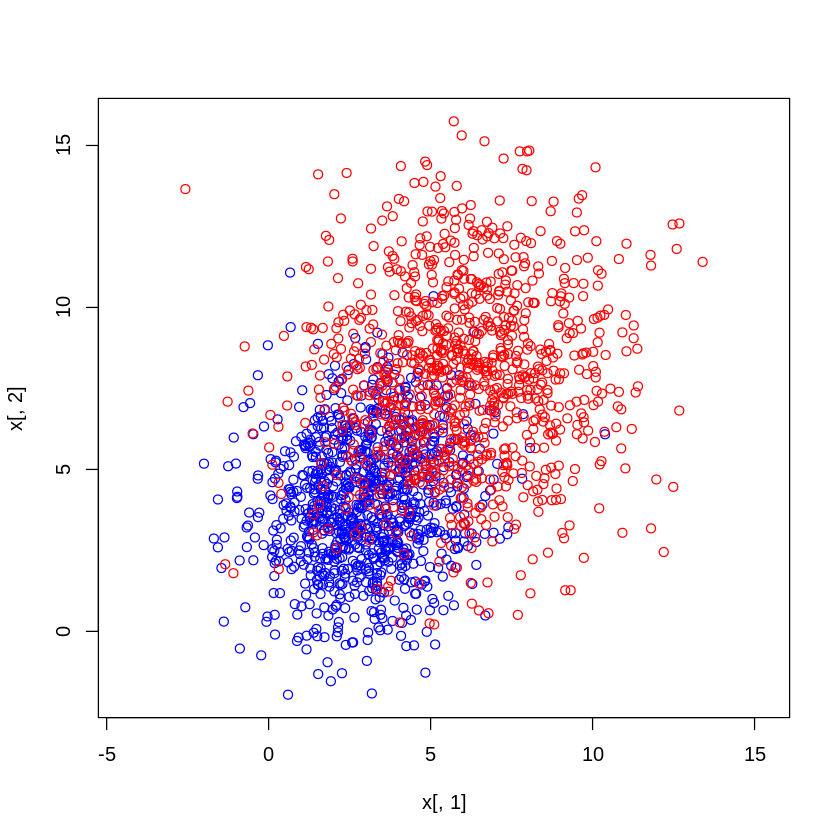

In [42]:
plot(x[,1],x[,2],col = c('blue','red')[as.factor(y)],asp = 1)

## 2
Aplica un PCA a estos datos, representando las direcciones de los EOFs. Los PCs representan las proyecciones en este nuevo espacio. Represéntalos en un otro diagrama de dispersión.

In [0]:
PCA = prcomp(x,scale. = FALSE,center = TRUE)

In [0]:
eofs = PCA$rotation
cent = PCA$center

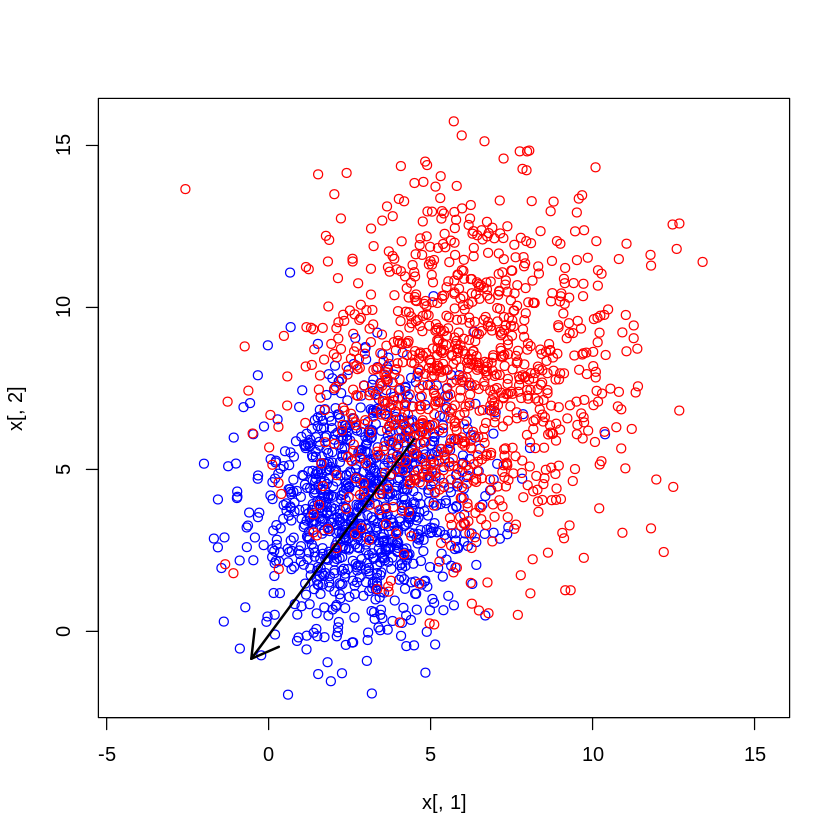

In [53]:
plot(x[,1],x[,2],col = c('blue','red')[as.factor(y)],asp = 1)
arrows(cent[1],cent[2],eofs[1,1],eofs[2,1],lwd = 2)

## 3
Utiliza la información de las clases para aplicar un LDA a estos datos

In [29]:
lda(y ~ x)

Call:
lda(y ~ x)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
        x1       x2
0 2.045193 3.985787
1 6.034769 7.002432

Coefficients of linear discriminants:
         LD1
x1 0.4213462
x2 0.2033221